# Raw data quality checks

Data quality monitoring is a fundamental step of every analysis. It becomes even more important when there are a lot of data to be processed in a short time, thus people do not have a lot of time to inspect all the data features.

In this case, having some reference plots helps a lot, providing a baseline on what should be expected. However, critical eye and common sense are always required to evaluate what you are looking at.
The emulsion film quality is usually classified as:

    Green: everything fine nothing to report
    Yellow: for now not to be rescanned, but to be inspected further
    RED: to be rescanned 

## Micro-tracks data format

Unless stated differently, we refer as "raw-data" the first output of the scanning, 
the micro-tracks, i.e. the segments reconstructed separately in the two emulsion layer of a single film


### Run file information

Inside the run file there are following objects:

* Run file header (EdbRunHeader)
* Views tree with the data

One entry into the tree is one microscope view. All data inside the view are in local **View Reference System**. The information about the view position in respect to stage (plate) kept in the view header.

Let's have a look with Views->Print() from one example film

In [1]:
// %jsroot on //activate this if you want to be able to zoom / modify plots

In [2]:
// load FEDRA (in lxplus terminal, just do .x $FEDRA_ROOT/macros/rootlogon.C)
TString fedrapath(gSystem->Getenv("FEDRA_ROOT"));
gROOT->ProcessLine((TString(".x ")+fedrapath+TString("/macros/rootlogon.C")).Data())

Load FEDRA libs
(long) 0


In [3]:
TFile *inputfile = TFile::Open("/eos/experiment/sndlhc/emulsionData/2022/Napoli/SND/mic2/RUN1_W2_B1/P41/tracks.raw.root")

(TFile *) 0x7fa06587abc0


In [4]:
Views->Print()

******************************************************************************
*Tree    :Views     : Scanning Viewes data                                   *
*Entries :   148188 : Total =     24573588311 bytes  File  Size = 14789451869 *
*        :          : Tree compression factor =   1.66                       *
******************************************************************************
*Br    0 :clusters  : Int_t clusters_                                        *
*Entries :   148188 : Total  Size=    1249501 bytes  File Size  =     270148 *
*Baskets :      183 : Basket Size=      32000 bytes  Compression=   4.45     *
*............................................................................*
*Br    1 :clusters.fUniqueID : UInt_t fUniqueID[clusters_]                   *
*Entries :   148188 : Total  Size=     614057 bytes  File Size  =      26337 *
*Baskets :      183 : Basket Size=      11487 bytes  Compression=  23.16     *
*..................................................

There are the following superbranches in the Views tree:

* headers: General information about view position and contents
* clusters, array of clusters: all clusters fond in the view are here
* segments, array of segments: all segments found in the view
* tracks, not used now;
* frames, information about each frame and eventually image (image usually do not saved)

For details about all branches, see backup slide (also uploaded in TWiki).

For now, we will just plot as example the TX angle of reconstructed segments;

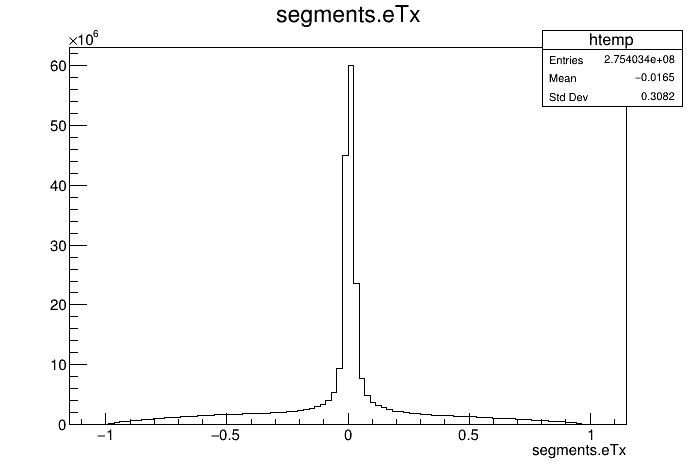

In [5]:
//the high density of our data requires TTree->Draw() to default to double, not float
gEnv->SetValue("Hist.Precision.1D", "double");
gEnv->SetValue("Hist.Precision.2D", "double");
gEnv->SetValue("Hist.Precision.3D", "double");
//drawing one variable as example
TCanvas *c1 = new TCanvas();
Views->Draw("segments.eTx");
c1->Draw();

## Quick scan quality inspection and emulsion thickness measurement
This script is used to inspect the thickness of emulsion layers:

* **1** and **2** show the number of segments in bottom and top layers;
* **3** shows the thickness 1D distributions for bottom layer (blue), top layer (red) and plastic base(black);
* **4**, **5** and **6** show the thickness maps for bottom layer (**4**), top layer (**5**) and plastic base (**6**): 

It can be downloaded from the GitHub repository about emulsion analysis in SND@LHC

In [6]:
!wget https://github.com/SND-LHC/emu_reco_analysis/raw/master/quality_checks/thickness.C -O thickness.C

--2023-10-17 16:11:47--  https://github.com/SND-LHC/emu_reco_analysis/raw/master/quality_checks/thickness.C


Resolving github.com (github.com)... 140.82.121.4


Connecting to github.com (github.com)|140.82.121.4|:443... connected.


HTTP request sent, awaiting response... 302 Found


Location: https://raw.githubusercontent.com/SND-LHC/emu_reco_analysis/master/quality_checks/thickness.C [following]


--2023-10-17 16:11:48--  https://raw.githubusercontent.com/SND-LHC/emu_reco_analysis/master/quality_checks/thickness.C


Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...


Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.

HTTP request sent, awaiting response... 200 OK
Length: 8779 (8.6K) [text/plain]
Saving to: ‘thickness.C’

100%[======================================>] 8,779       --.-K/s   in 0.003s  

2023-10-17 16:11:48 (2.68 MB/s) - ‘thickness.C’ saved [8779/

In [7]:
.x thickness.C


 300 


Error in <TUnixSystem::SetDisplay>: Can't figure out DISPLAY, set it manually
In case you run a remote ssh session, restart your ssh session with:
=========>  ssh -Y
Error in <TGClient::TGClient>: only one instance of TGClient allowed


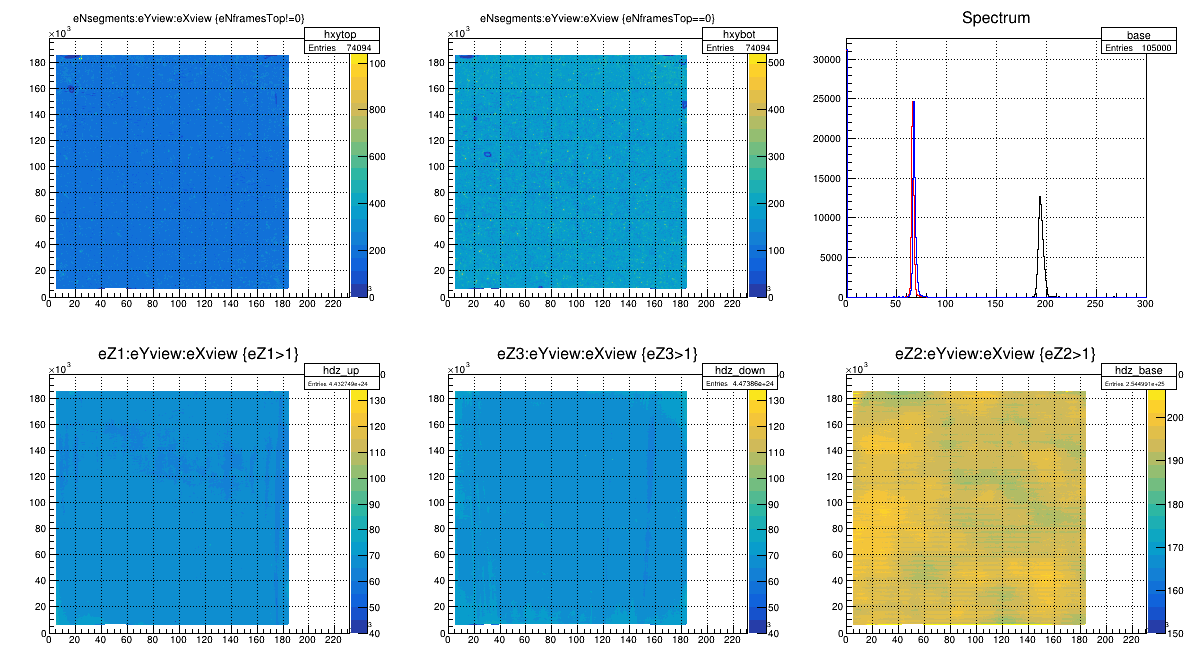

In [8]:
//The previous error was simply due to SWAN not displaying plots automatically. We can do it by ourselves
gROOT->FindObject("diff")->Draw()

## Raw data in depth inspection

The script check_raw.C provides more details about the raw data.

It is useful to cross-check doubts about problematic films seen with the previous script.

However, it takes times to be launched. 

So, here I will consider a small scan from RUN1 fog measurement as an example, just to be quick

1D Plots are usually separated in different line colors:

* Blue line: down side of the emulsion plate;
* Red line: up side of the emulsion plate;
* Black line: total (sum of blue and red lines) 

The script gives you 3 canvases. 

In [9]:
//TFile *run0_small = TFile::Open("/eos/experiment/sndlhc/emulsionData/2022/Napoli/SND/mic2/RUN0_W3_B1/P030_fog/tracks.raw.root")
TFile *run1_fog = TFile::Open("/eos/experiment/sndlhc/emulsionData/2022/Napoli/SND/mic2/RUN1_W2_B4/P07_offlinescans_onesquarecm_withfog_gpu_standard_processing/tracks.raw.root")

(TFile *) 0x7fa02fff5160


In [10]:
!wget https://raw.githubusercontent.com/SND-LHC/emu_reco_analysis/master/quality_checks/check_raw.C -O check_raw.C

--2023-10-17 16:12:01--  https://raw.githubusercontent.com/SND-LHC/emu_reco_analysis/master/quality_checks/check_raw.C


Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...


Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.

HTTP request sent, awaiting response... 200 OK
Length: 7657 (7.5K) [text/plain]
Saving to: ‘check_raw.C’

100%[======================================>] 7,657       --.-K/s   in 0.003s  

2023-10-17 16:12:02 (2.60 MB/s) - ‘check_raw.C’ saved [7657/7657]




In [11]:
.x check_raw.C

Red  line: Top    side
Blue line: Bottom side


### Plot raw_z 

1. Space distribution of the scanned views;
2. Same as before, presented as time dependence;
3. Number of clusters vs Z. In the ideal case, it should be nearly flat in the central valley;
4. Approximately base thickness;
5. Number of clusters vs frame ID; (check that it is at least twice the set threshold, currently 2000)
6. Same as 5. for the other layer;
7. Microtracks starting point distribution;
8. Same as 7. for the other layer;

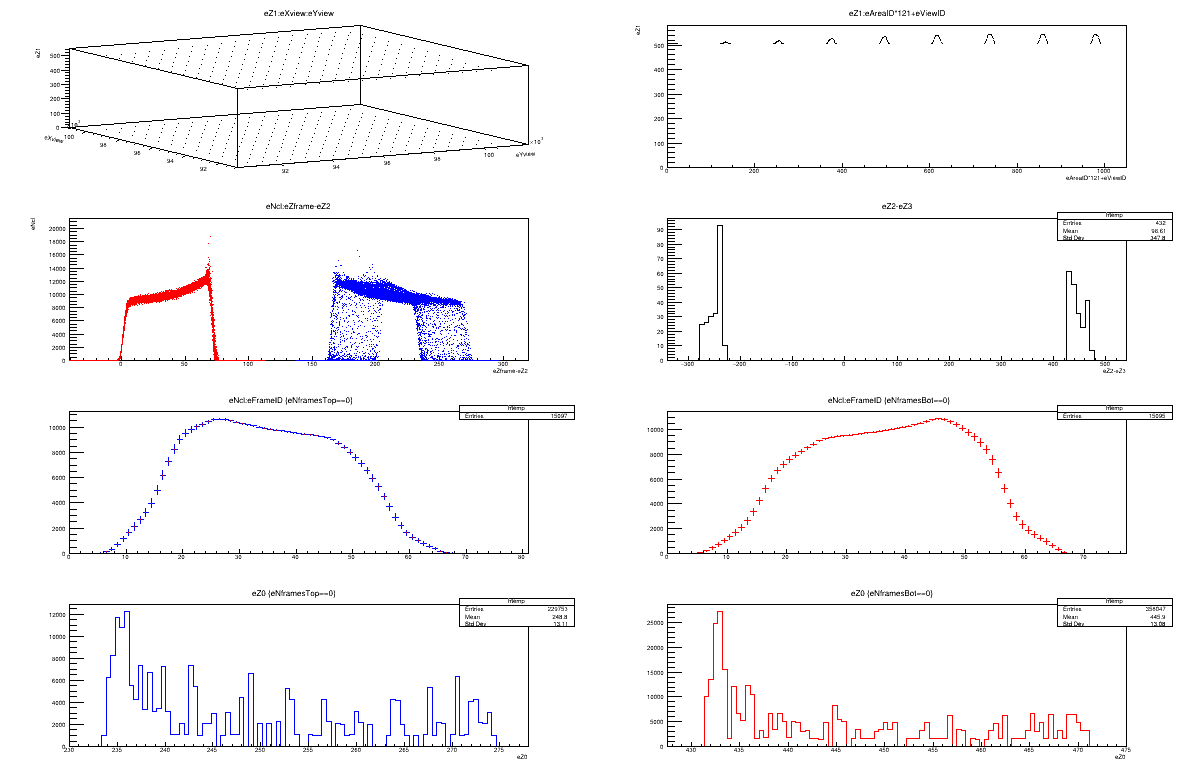

In [12]:
gROOT->FindObject("cz")->Draw()

## Plot raw view

1. distribution of the microtracks inside one view (down side). In the ideal case it should be uniform.
2. same as 1 presented as 2-d color plot; down side 
3. same as 1 for up side;
4. same as 2 for up side;
5. TX Micro-track angular distribution;
6. Same as 5 for TY;
7. Bidimensional angular distribution for down side;
8. Same as 7 for up side;

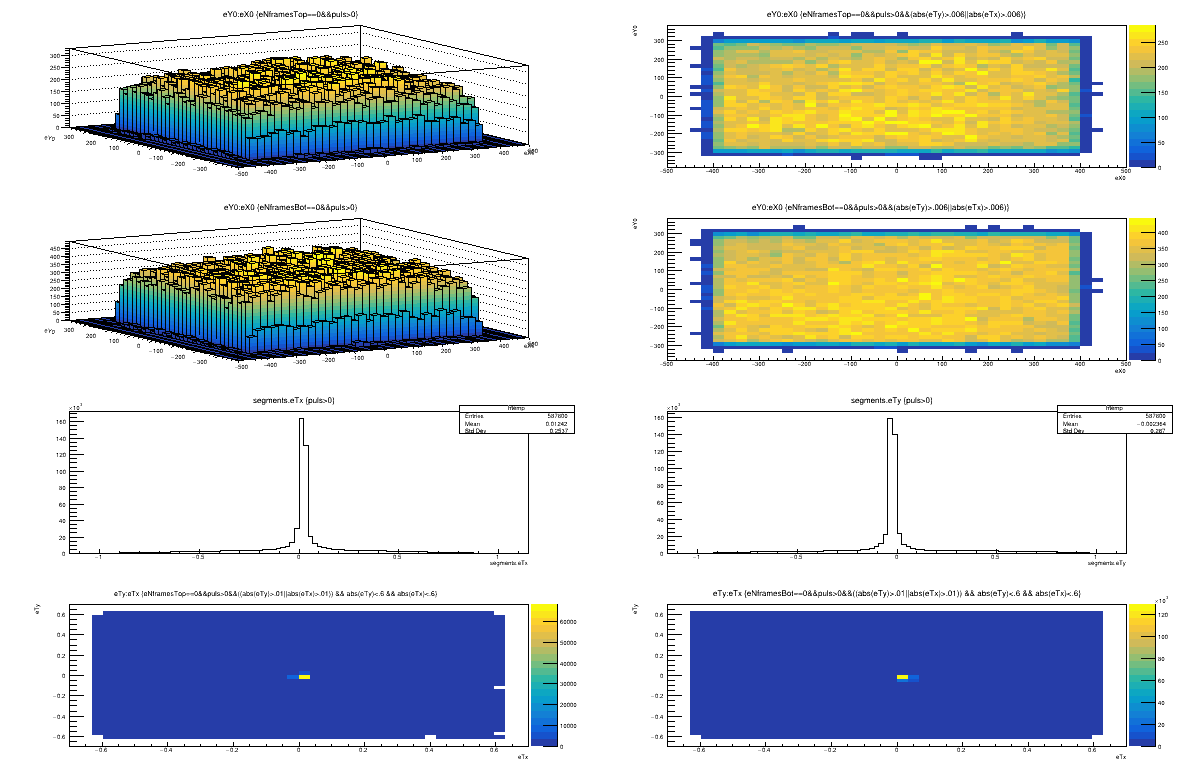

In [13]:
gROOT->FindObject("view")->Draw()

## Plot_raw_surf
1. Micro-tracks distribution on the scanned surface;
2. Same as 1 for up side;
3. Micro-tracks/ distribution;
4. Clusters/view distribution;
5. Pulse/height distribution;
6. Micro-track volume;
7. RMS of cluster distribution;
8. Same as 7, after tracking;

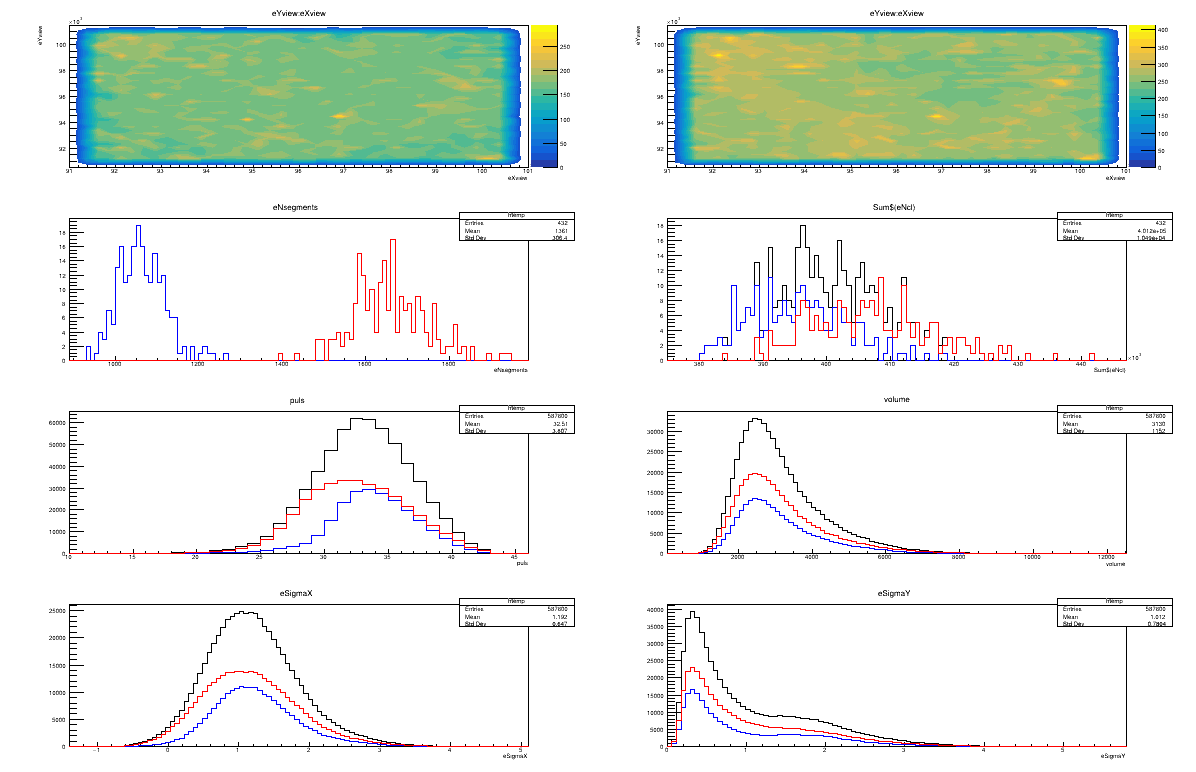

In [14]:
gROOT->FindObject("csurf")->Draw()

# Backup 

Documentation from the OPERA Wiki about TTree Views structure of branches



#### View Headers branch

Header is one/view. The header object of the type EdbViewHeader:

```
class EdbViewHeader : public TObject {

private:

  Int_t    eViewID;   // View ID in the Area
  Int_t    eAreaID;   // Area ID in Run (prediction id)

  Float_t  eXview;    // stage coord, top left corner
  Float_t  eYview;    // 

  Float_t  eZ1;    //
  Float_t  eZ2;    // emulsion surfaces in absolute stage coordinates
  Float_t  eZ3;    // measured once per view
  Float_t  eZ4;    //

  Int_t    eNframesTop;  // top    | number of frames in the view (0,1,2...16...)
  Int_t    eNframesBot;  // bottom | 

  Int_t   eTime;         // System time since last view saving in msec

  Int_t   eNclusters;    // number of clusters saved in the view
  Int_t   eNsegments;    // number of segments saved in the view

  EdbAffine2D   eAff;    // affine transformation for the view 
                         // (make sence for SySal-converted data only)

  TArrayF  *eZlevels;    //! z of each taken view (frame) (obsolete!)

  Int_t   eCol;          // the position of the view in the scanned area, measured in views, 
  Int_t   eRow;          // starting from the reference angle (typically up-left)

  Int_t   eStatus;       // View scanning status
  Int_t eEvent           //optional: the part of the tree may be associated with event. Setted via run->header->Flag(8)
  Int_t eTrack           //optional: some view group may be associated with track. Setted via run->header->Flag(9)
```

#### Clusters branch

All clusters of the view organized as one TClonesArray of the objects type EdbCluster:

```
class EdbCluster : public TObject, public EdbPoint3D {

public:

  Float_t    eX;       // cluster coordinates (in microns when converted from rwd)
  Float_t    eY;       //
  Float_t    eZ;       //
  Float_t    eArea;    // Cluster area: number of pixels
  Float_t    eVolume;  // Cluster volume - in case of greyscale pixels
  Int_t      eFrame;   // frame index
  Int_t      eSide;    // emulsion side index
  Int_t      eSegment; // segment id to be attached (-1 if no segment)
```


#### Segments branch

All segments of the view organized as one TClonesArray of the objects type EdbSegment.

Note: the segments here are what we call **micro-tracks**!

```
class EdbSeg3D : public TObject {
private:
  Float_t    eX0;         // |_coordinates of the segment's initial point
  Float_t    eY0;         // | in the SAME FOR ALL SEGMENTS stage coordinate system
  Float_t    eZ0;         // |
  Float_t    eTx;         // tanX: deltaX/deltaZ
  Float_t    eTy;         // tanY: deltaY/deltaZ
  Float_t    eDz;         // length of the segment along Z with sign

//______________________________________________________________________________
class EdbSegment : public EdbSeg3D {
private:
  Int_t      eSide;       // side of the segment location (0-up, 1-down)
  Int_t      ePuls;       // puls height (number of clusters) OR (sum of clust area)*1000+(number of clusters)
  Int_t      eID;         // segment identifier
  Float_t    eSigmaX;     // dispersion parameter of grains around track line
  Float_t    eSigmaY;     // dispersion parameter of grains around track line
```

When data converted from Sysal rwd the eSigmaX is filled with SIGMA provided by sysal, eSigmaY in this case dummy



#### Frames branch

All frames of the view organized as one TObjArray of the objects type EdbFrame

Note: the frames are the **images at different heights**, for each xy view there are multiple frames!

```
class EdbFrame : public TObject {

private:

  Int_t       eFrameID;           // frame identifier
  Float_t     eZframe;            // Z-coordinate of the frame
  Int_t       eNcl;               // total number of clusters found in the frame
  Int_t       eNpix;              // total number of nonzero pixels found in the frame
  EdbImage    *eImage;            // CCD image
```
